# Исследование объявлений о продаже квартир

✅ **Описание проекта:**

Входные данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет от сервиса Яндекс Недвижимость.

Аналитическое исследование данных поможет построить автоматизированную систему, определяющую рыночную стоимость объектов недвижимости. 
Она отследит аномалии и мошенническую деятельность.
    
✅ **Цель исследования:**
    
Необходимо провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.
Впоследствии это поможет определять рыночную стоимость объектов недвижимости. 
    
✅ **Описание данных:**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении
    
✅ **План работы:**
    
1. Изучаем общую информацию о данных
2. Делаем предобработку данных
3. Определяем параметры, влияющие на цену объектов
4. Делаем общий вывод
    
</div>

### Подключаем библиотеки

In [1]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
from IPython.display import display
import matplotlib.pyplot as plt

### Открываем файл с данными и изучаем общую информацию

In [2]:
# читаем файл и изучаем данные. 
# для разделения данных используем параметр sep, который разделит данные по значению \t
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
pd.set_option('display.max_columns', None)
print('Всего строк:', len(data))
columns = [
    'airports_nearest',
    'balcony',
    'ceiling_height',
    'cityCenters_nearest',
    'days_exposition',
    'floor',
    'floors_total',
    'is_apartment',
    'kitchen_area',
    'last_price',
    'living_area',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'rooms',
    'total_area'
]
#data = data[columns]
data.head()

Всего строк: 23699


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# выводим основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

👍**Вывод про первичное изучение данных**

Всего в файле 23699 и 22 колонки. Имеются пропущенные значения. Данные содержат колонки с целочисленными и дробными цифрами, строки и булевые значения. 

Видим необходимость в дальнейшем поработать с пропусками и сменой типов данным (например, скорее всего пропуски в is_apartment означают то, что недвижимость является квартирой, а колонка должна иметь булев тип).  

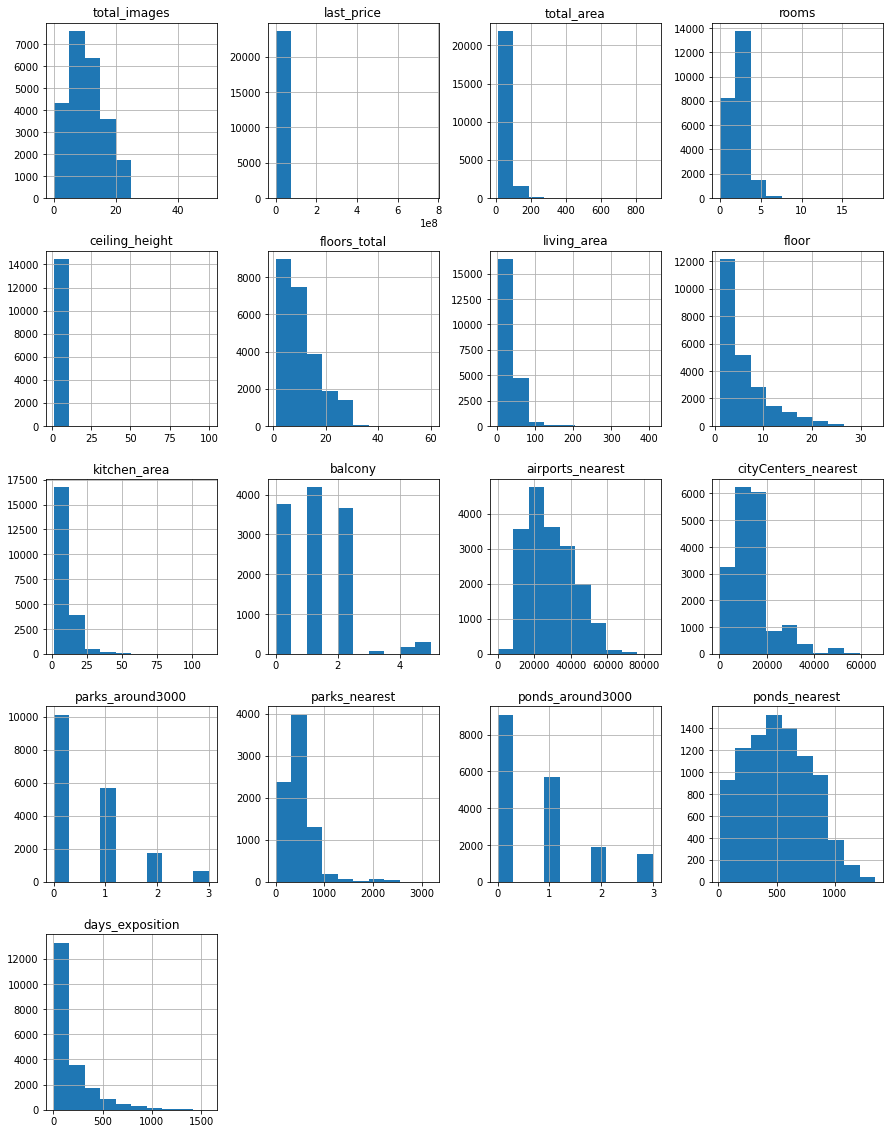

In [4]:
# строим гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

### Выполняем предобработку данных

#### Изучим данные на предмет пропущенных значений и типов данных. Заменим пропуски там, где это возможно. Изменим тип данных при необходимости.

Пишем функцию, которая генерирует поля обработки данных для каждого столбца и включает в себя методы анализа.

In [5]:
def create_cell (shell, text):
    payload = dict(
        source='set_next_input',
        text=text,
        replace=False
    )
    shell.payload_manager.write_payload(payload, single=False)
    
def generate_column_preprocess_discription(data):
    shell = get_ipython()
    for i, column in reversed(list(enumerate(data.columns))):
        create_cell(shell, dedent(
            '''
            * Изменение
            '''
        ))
        create_cell(shell, dedent('''
            * Вывод
            \t Обнаруженные аномалии:
            \t Причины, по которым они могли возникнуть: 
            \t Как исправлять:
            \t Финальный тип и почему:
            '''
        ))
        create_cell(shell, dedent(
            f'''
            investigate_column(data["{column}"])
            '''
        ))
        create_cell(shell, dedent(
            '''
            * Изучим значения
            '''
        ))
        create_cell(shell, dedent(
            f'''
            🔎 **Обработка "{column}"**
            '''
        ))
        
        if i == 20:
            break

In [6]:
def investigate_column(column):
    print('Пропущено значений', column.isna().sum())
    print(column.describe())

In [7]:
#generate_column_preprocess_discription(data)


🔎 **Обработка "ponds_nearest"**



* Изучим значения


In [8]:

investigate_column(data["ponds_nearest"])


Пропущено значений 14589
count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** достаточно большое количество пропущенных значений. 
     
	 - **Причины, по которым они могли возникнуть:** Пропуски в данных полях могут означать отсуствие водоемов рядом.
     
	 - **Как исправлять:** Заполнение данных полей, к примеру, средним арифметическим значением приведет к искажению данных, так как в случае фактического отсуствия водоема рядом в поле должно стоять значение NaN. Им и заполним пропуски.
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как расстояние до объекта может измеряться в дробных величинах.


In [9]:
# заполняем пропуски значением NaN и проверяем корректность заполнения (пропуском должно стать 0).
data['ponds_nearest'] = data['ponds_nearest'].fillna('NaN')
data['ponds_nearest'].isna().sum()

0


🔎 **Обработка "parks_nearest"**



* Изучим значения


In [10]:

investigate_column(data["parks_nearest"])


Пропущено значений 15620
count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** достаточно большое количество пропущенных значений. 
     
	 - **Причины, по которым они могли возникнуть:** Пропуски в данных полях могут означать отсуствие парков рядом.
     
	 - **Как исправлять:** Заполнение данных полей, к примеру, средним арифметическим значением приведет к искажению данных, так как в случае фактического отсуствия парка рядом в поле должно стоять значение NaN. Им и заполним пропуски.
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как расстояние до объекта может измеряться в дробных величинах.


In [11]:
# заполняем пропуски значением NaN и проверяем корректность заполнения (пропуском должно стать 0).
data['parks_nearest'] = data['parks_nearest'].fillna('NaN')
data['parks_nearest'].isna().sum()

0


🔎 **Обработка "days_exposition"**



* Изучим значения


In [12]:

investigate_column(data["days_exposition"])


Пропущено значений 3181
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Достаточно большое количество пропущенных значений (13% от общиего объема данных). Также максимальное значение по столбцу является подозрительным: 1580. Если в столбце указывается количество дней размещения объявления, то 1580 дней - это больше 4 лет. Похоже на выброс, с которым мы поработаем в разделе 5 данного исследования. 
     
	 - **Причины, по которым они могли возникнуть:** Длительность размещения обявления должна была быть проставлена автоматически, так как данные берутся из даты размещения объявления и даты закрытия. Здесь либо имеет место быть технический сбой, либо объявления продолжают висеть в открытом статусе.
     
	 - **Как исправлять:** Считаю, что удалять строчки с пропущенными данными некорректно, так как построчное удаление просто оставит нас без существенного количества данных. Для того, чтобы данные строчки участвовали в расчетах в дальнейшем исследовании заполним все пропуски значением NaN.
     
	 - **Финальный тип и почему:** Тип столбца float64 является не корректным, так как количество дней должно измеряться в целочисленных значениях. Однако в связи с тем, что пропуски будут заполнены значением NaN, изменить тип данных на int не предотсавляется возможным. Оставим float64, так как это не сильно принципиально для дальнейшего исследования. 


In [13]:
# заполняем пропуски значением NaN и проверяем корректность заполнения (пропуском должно стать 0).
data['days_exposition'] = data['days_exposition'].fillna('NaN')
data['days_exposition'].isna().sum()

0


🔎 **Обработка "last_price"**



* Изучим значения


In [14]:

investigate_column(data["last_price"])


Пропущено значений 0
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Аномалий не обнаружено, выбросов тоже.  
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как стоимость недвижимости может измеряться в дробных числах. 



🔎 **Обработка "total_area"**



* Изучим значения


In [15]:

investigate_column(data["total_area"])


Пропущено значений 0
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Аномалий не обнаружено, выбросов тоже.  
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как общая площадь недвижимости может измеряться в дробных числах. 



🔎 **Обработка "living_area"**



* Изучим значения


In [16]:

investigate_column(data["living_area"])


Пропущено значений 1903
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Достаточно большое количество пропущенных значений. Также минимальное значение по столбцу является подозрительным: 2. Похоже на выброс, с которым мы поработаем в разделе 5 данного исследования. 
     
	 - **Причины, по которым они могли возникнуть:** Пропуски в столбце являются случайными. Пользователь мог просто не указать жилую площадь.  
     
	 - **Как исправлять:** Найдем соотношение средней жилой площади к средней общей площади и используем полученное значение для замены пропусков. Если останутся пропуски, заполним их NaN для того, чтобы данные строчки участвовали в расчетах в дальнейшем исследовании.
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как жилая площадь недвижимости может измеряться в дробных числах.


In [17]:
#для каждого количества комнат считаем, какую среднюю долю площади кухни, и назначаем для пропусков такое значение 
for i in (0, data[ 'rooms' ].max()):
    av = (data[data[ 'rooms' ] == i][ 'living_area' ] / data[data[ 'rooms' ] == i][ 'total_area' ]).mean()
    data[ 'living_area' ] = data[ 'living_area' ].fillna(value = data[ 'total_area' ] * av)

In [18]:
investigate_column(data["living_area"])

Пропущено значений 0
count    23699.000000
mean        35.176187
std         22.997411
min          2.000000
25%         19.000000
50%         30.400000
75%         42.900000
max        432.529674
Name: living_area, dtype: float64



🔎 **Обработка "kitchen_area"**



* Изучим значения


In [19]:

investigate_column(data["kitchen_area"])


Пропущено значений 2278
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Достаточно большое количество пропущенных значений. Также минимальное значение (1) и максимальное значение (490) по столбцу являются подозрительными. Похоже на выброс, с которым мы поработаем в разделе 5 данного исследования. 
     
	 - **Причины, по которым они могли возникнуть:** Пропуски в столбце являются случайными. Пользователь мог просто не указать площадь кухни.  
     
	 - **Как исправлять:** Найдем соотношение средней кухонной площади к средней общей площади и используем полученное значение для замены пропусков. Если останутся пропуски, заполним их NaN для того, чтобы данные строчки участвовали в расчетах в дальнейшем исследовании.
     
	 - **Финальный тип и почему:** Тип столбца float64 является корректным, так как площадь кухни может измеряться в дробных числах.


In [20]:
#для каждого количества комнат считаем, какую среднюю долю площади кухни, и назначаем для пропусков такое значение 
for i in (1, data[ 'rooms' ].max()):
    av = (data[data[ 'rooms' ] == i][ 'kitchen_area' ] / data[data[ 'rooms' ] == i][ 'total_area' ]).median()
    data[ 'kitchen_area' ] = data[ 'kitchen_area' ].fillna(value = data[ 'total_area' ] * av)

In [21]:
investigate_column(data["kitchen_area"])

Пропущено значений 0
count    23699.000000
mean        10.901605
std          6.512469
min          1.300000
25%          7.100000
50%          9.480000
75%         12.000000
max        123.919308
Name: kitchen_area, dtype: float64


Вызывает подозрение максимальная площадь кухни в 93 кв.м. Посмотрим пристальнее на эту строчку: 

In [22]:
data[data['kitchen_area'] == data['kitchen_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15016,8,150000000.0,500.0,2016-01-13T00:00:00,4,3.2,7.0,342.733498,7,NaN,False,False,123.919308,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0


Кажется, что при общей площади в 181 кв.м. кухня имеет право быть размером в 93 кв.м., если это к примеру кухня-гостинная. Оставим всё как есть. 


🔎 **Обработка "balcony"**



* Изучим значения


In [23]:

investigate_column(data["balcony"])


Пропущено значений 11519
count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Достаточно большое количество пропущенных значений. 
     
	 - **Причины, по которым они могли возникнуть:** Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. 
     
	 - **Как исправлять:** Пропуски можно заменить на число 0.
     
	 - **Финальный тип и почему:** Тип столбца float64 является не корректным, так как количество балконов может быть только целочисленным значением. Изменим тип данных на int. 


In [24]:
# заполняем пропуски нулевым значением
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

In [25]:
# дополнительно изучим уникальные значеничя
data["balcony"].unique()

array([0., 2., 1., 5., 4., 3.])

In [26]:
# изменяем тип данных
data['balcony'] = data['balcony'].astype(int)


🔎 **Обработка "rooms"**



* Изучим значения


In [27]:

investigate_column(data["rooms"])


Пропущено значений 0
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


In [28]:
# дополнительно изучим уникальные значеничя
data["rooms"].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])


* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют строки, где указано 0 комнат.
     
	 - **Причины, по которым они могли возникнуть:** Вероятно, продавцы указали 0 еомнат по причине того, что это квартира-студия.
     
	 - **Как исправлять:** 0 можем заменить на значение 1, так как фактически в квартире студии имеется однаккомната (она же и кухня и все остальное жилое помещение). Такого рода аномалию будем исправлять в разделе 5 нашего исследования. 
     
	 - **Финальный тип и почему:** Тип столбца float64 является не корректным, так как количество комнат может быть только целочисленным значением. Изменим тип данных на int. 


In [29]:
# изменяем тип данных
data['rooms'] = data['rooms'].astype(int)


🔎 **Обработка "is_apartment"**



* Изучим значения


In [30]:

investigate_column(data["is_apartment"])


Пропущено значений 20924
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения.
     
	 - **Причины, по которым они могли возникнуть:** Вероятно, если продавец не указал, что продает апартаменты, то недвижимость является квартирой. 
     
	 - **Как исправлять:** Пропуски можем заполнить значением False.
     
	 - **Финальный тип и почему:** Столбец is_apartment по своему характеру содержит булевые значения, при этом на данный момент является типом object. Произведем замену на тип bool.


In [31]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

In [32]:
data['is_apartment'] = data['is_apartment'].astype(bool)


🔎 **Обработка "ceiling_height"**



* Изучим значения


In [33]:

investigate_column(data["ceiling_height"])


Пропущено значений 9195
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в большом количестве, а также подозритекльное минимальное значение (1) и подозрительное максимальное значение (100). 
     
	 - **Причины, по которым они могли возникнуть:** Кажется, что высоту потолков не указывали продавцы в связи с необходимостью её измерять.
     
	 - **Как исправлять:** Считаю, что удалять строчки с пропущенными данными некорректно, так как построчное удаление просто оставит нас без существенного количества данных.Для того, чтобы данные строчки участвовали в расчетах в дальнейшем исследовании заполним все пропуски значением NaN. С выбросами по минимальному и максимальному значению будем работать в разделе 5 исследования.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является корректным, так как высота потолка может указываться в дробном значении. 


In [34]:
data['ceiling_height'] = data['ceiling_height'].fillna('NaN') 

In [35]:
data['ceiling_height'].isna().sum()

0


🔎 **Обработка "cityCenters_nearest"**



* Изучим значения


In [36]:

investigate_column(data["cityCenters_nearest"])


Пропущено значений 5519
count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в большом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Пропуски в столбцах с картографическими данными лучше не трогать, так как мы не можем восстановить их с достаточной точностью. Лучше заполним их NaN значением.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является корректным, так как расстояние до центра города может указываться в дробном значении. 


In [37]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna('NaN')
data['cityCenters_nearest'].isna().sum()

0


🔎 **Обработка "airports_nearest"**



* Изучим значения


In [38]:

investigate_column(data["airports_nearest"])


Пропущено значений 5542
count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в большом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Пропуски в столбце содержат в себе количественные данные. Следовательно пропуски можно заполнить средним арифметическим значением. При этом необходмо учитывать среднее значение в зависимости от населенного пункта, так как средний показатель по Санкт-Петербургу и средний показатель по сельской местности могут существенно отличаться. В случае, если пропуски останутся, заполним их NaN значением.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является корректным, так как расстояние до аэропорта может указываться в дробном значении. 


In [39]:
# заполняем пропуски в расстоянии до центра города
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['airports_nearest'].isna()), 'airports_nearest'] = \
    data.loc[(data['locality_name'] == t), 'airports_nearest'].mean()

In [40]:
data['airports_nearest'].isna().sum()

5394

In [41]:
data['airports_nearest'] = data['airports_nearest'].fillna('NaN')
data['airports_nearest'].isna().sum()

0


🔎 **Обработка "floor"**



* Изучим значения


In [42]:

investigate_column(data["floor"])


Пропущено значений 0
count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [43]:
# дополнительно изучим уникальные значеничя
data["floor"].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])


* Вывод
	 
     - **Обнаруженные аномалии:** Аномалии не найдены

	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является не корректным, так как номер этажа может быть только целочисленное значение. Исправим. 


In [44]:
data['floor'] = data['floor'].astype('int')


🔎 **Обработка "floors_total"**



* Изучим значения


In [45]:

investigate_column(data["floors_total"])


Пропущено значений 86
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


In [46]:
# дополнительно изучим уникальные значеничя
data["floors_total"].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])


* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в небольшом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Укажем общее количество этажей исходя из градостроительных традиций - минимальное из 5, 9, 16 или 24 этажей, в зависимости от того, на каком этаже объект. Если квартира находится на этаже с 1 по 5, то ей установим 5 этаж, и так далее. 
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является не корректным, так как колитчество этажей может являться только целочисленным значением. 


In [47]:
for i in [5, 9, 16, 24]:
    data.loc[(data['floors_total'].isna()) & (data['floor'] <= i), 'floors_total'] = i

In [48]:
data['floors_total'].isna().sum()

0

In [49]:
data['floors_total'] = data['floors_total'].astype('int')


🔎 **Обработка "parks_around3000"**



* Изучим значения


In [50]:

investigate_column(data["parks_around3000"])


Пропущено значений 5518
count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в большом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Пропуски в данных полях могут означать отсуствие парков рядом. Следовательно, заполнение данных полей приведет к искажению данных. Поэтому пропуски в столбцах считаю, необходимо оставить и заполнить их значением NaN для произведения дальнейших расчетов с данными.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является корректным, так как расстояние до парка может указываться в дробном значении. 


In [51]:
data['parks_around3000'] = data['parks_around3000'].fillna('NaN')
data['parks_around3000'].isna().sum()

0


🔎 **Обработка "ponds_around3000"**



* Изучим значения


In [52]:

investigate_column(data["ponds_around3000"])


Пропущено значений 5518
count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в большом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Пропуски в данных полях могут означать отсуствие парков рядом. Следовательно, заполнение данных полей приведет к искажению данных. Поэтому пропуски в столбцах считаю, необходимо оставить и заполнить их значением NaN для произведения дальнейших расчетов с данными.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом float64, что является корректным, так как расстояние до парка может указываться в дробном значении. 


In [53]:
data['ponds_around3000'] = data['ponds_around3000'].fillna('NaN')
data['ponds_around3000'].isna().sum()

0


🔎 **Обработка "locality_name"**



* Изучим значения


In [54]:

investigate_column(data["locality_name"])


Пропущено значений 49
count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object



* Вывод
	 
     - **Обнаруженные аномалии:** Присуствуют пропущенные значения в небольшом количестве. 
     
	 - **Причины, по которым они могли возникнуть:** Очевидно, что пропуски возникли в связи с тем, что продавцы не указывали данные в графе. 
     
	 - **Как исправлять:** Количество пропусков настолько мало (менее 1% от всех данных), то они не повлияют на итоговые выводы. Удалим соотвествующие строки.
     
	 - **Финальный тип и почему:** Столбец содержит значения с типом object, что является корректным. 


In [55]:
data.dropna(axis = 'index', subset = ['locality_name'], inplace = True)
data['locality_name'].isna().sum()

0

Проверим данные на верность типов данных и наличие оставшихся пропусков.


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  object 
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Изучаем уникальные значения в столбце с названиями и устраняем неявные дубликаты. 

In [57]:
# обраотаем неявные дубликаты в столбце locality_name
# В этом столбце могут быть одни и те же значения, но записанные по-разному: 
# с использованием заглавных и строчных букв. 
# приведем их к нижнему регистру. 
data['locality_name'] = data['locality_name'].str.lower()

In [58]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [59]:
data['locality_name'] = data['locality_name'].replace({'посёлок': 'поселок', 'поселок городского типа': 'поселок', 'городской поселок': 'поселок'}, regex=True)
data['locality_name'].unique() 

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок кузьмоловский', 'садовое товарищество новая ропша',
       'павловск', 'деревня пикколово', 'всеволожск', 'волхов',
       'кингисепп', 'приозерск', 'сестрорецк', 'деревня куттузи',
       'поселок аннино', 'поселок ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'ш

In [60]:
data['locality_name'].value_counts()

санкт-петербург                     15721
поселок мурино                        556
поселок шушары                        440
всеволожск                            398
пушкин                                369
                                    ...  
садовое товарищество новая ропша        1
деревня иссад                           1
поселок гончарово                       1
поселок дружноселье                     1
поселок почап                           1
Name: locality_name, Length: 338, dtype: int64

In [61]:
# считаем дубликаты
data.duplicated().sum()

0

### Добавляем в таблицу новые столбцы

* Цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой).

In [62]:
data['price_per_meter'] = (data['last_price'] / data['total_area']).round(2)
data['price_per_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_per_meter, dtype: float64

* День недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [63]:
# преобразовываем строки в даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# отбрасываем время
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1d')

# выводим день недели
data['first_exposition_day_of_week'] = data['first_day_exposition'].dt.weekday
data['first_exposition_day_of_week'].head()

0    3
1    1
2    3
3    4
4    1
Name: first_exposition_day_of_week, dtype: int64

* Месяц публикации объявления.

In [64]:
data['first_exposition_day_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['first_exposition_day_month'].head()

0     3
1    12
2     8
3     7
4     6
Name: first_exposition_day_month, dtype: int64

* Год публикации объявления.

In [65]:
data['first_exposition_day_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['first_exposition_day_year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: first_exposition_day_year, dtype: int64

* Тип этажа квартиры (значения — «первый», «последний», «другой»).

In [66]:
def get_floor_type(floor, floors_total):
    try:
        if floor == 1:
            return 'первый'
        elif 1 < floor < floors_total:
            return 'другой'
        else: 
            return 'последний'
    except:
        pass

In [67]:
data['floor_type'] = data.apply(lambda x: get_floor_type(x['floor'], x['floors_total']), axis=1)
data['floor_type'].value_counts()

другой       17397
последний     3341
первый        2912
Name: floor_type, dtype: int64

* Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [68]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')
data['center_distance'] = (data['cityCenters_nearest'].div(1000)).round()
data['center_distance']


0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: center_distance, Length: 23650, dtype: float64

### Проводим исследовательский анализ данных

#### Изучим параметры объектов и построим отдельные гистограммы для каждого из этих параметров

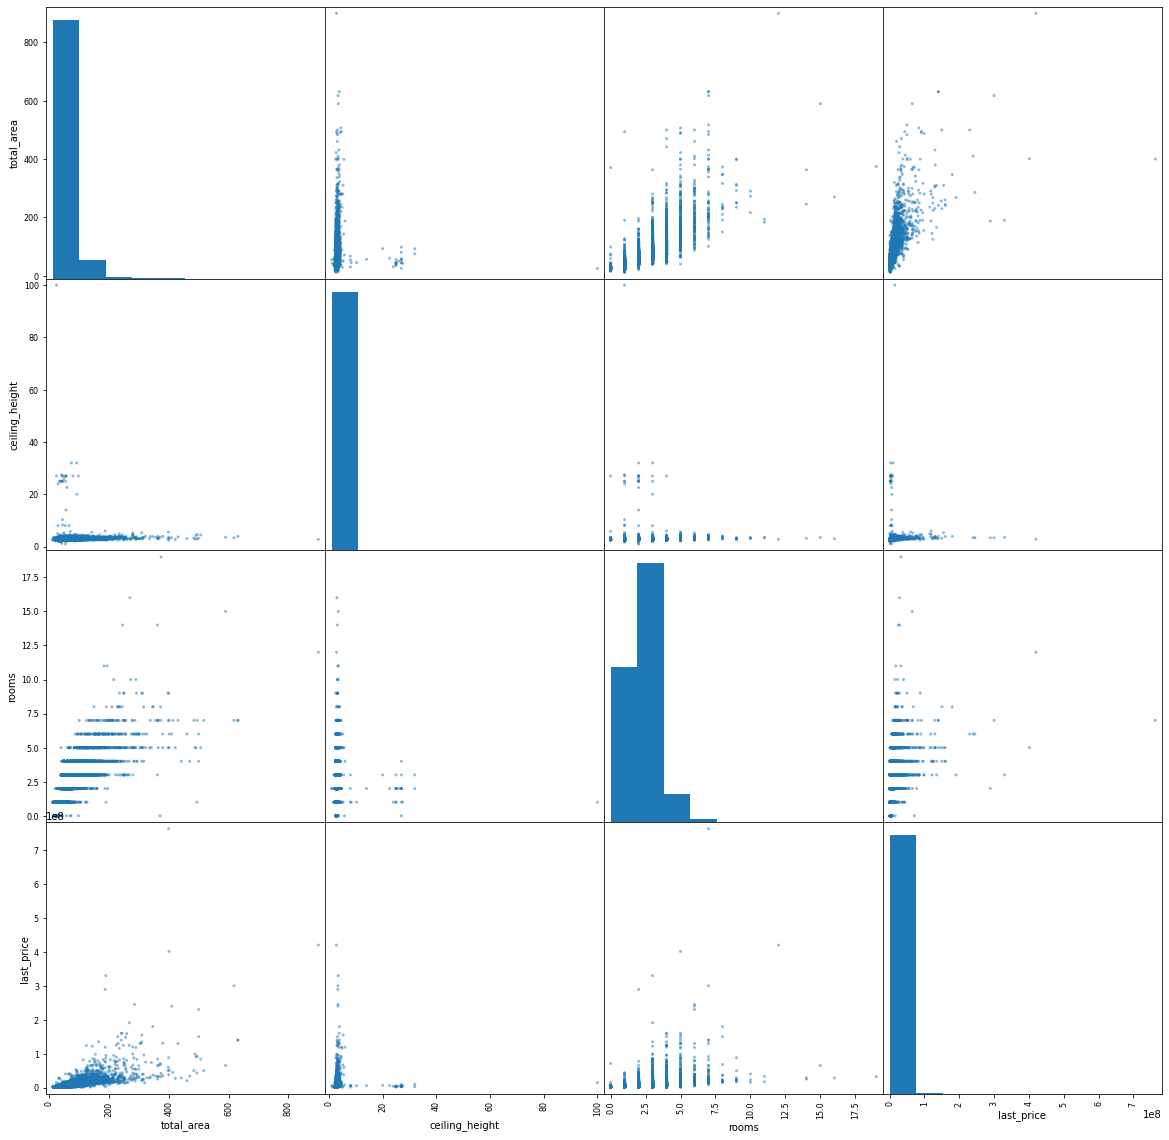

In [69]:
data['ceiling_height'] = data['ceiling_height'].astype('float')
part = data[['total_area', 'ceiling_height', 'rooms', 'last_price']]
pd.plotting.scatter_matrix(part, figsize=(20, 20));

🔎 **1. Изучаем "total_area"**

In [70]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

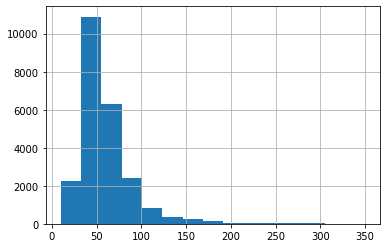

In [71]:
data['total_area'].hist(bins=15, range = (10, 350))

<AxesSubplot:>

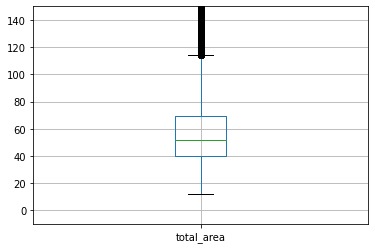

In [72]:
total_area = data[['total_area', 'locality_name']]
plt.ylim(-10, 150)
total_area.boxplot()

Можно увидеть, что большая часть значений лежит в диапазоне от 40 до 70 кв.м., что выглядит правдоподобно. 

Нижний «ус» лежит на 12 кв.м., минимальное значение. Верхний заканчивается около 115 кв.м. — это 1,5 межквартильного размаха. Всё, что лежит за верхним «усом», считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Изучим стандартное отклонение, чтобы понять природу распределения и выяснить, насколько значения однородны. Стандартное отклонение велико: 35.65. Это значит в наборе данных могут быть серьёзные аномалии или выбросы. 

Указана недвижимость площадью по 900 кв.м. Такое возможно в мегаполисе, но явно не в поселках.
Произведем выборку по Санкт-Петербургу и сравним гистограммы. 

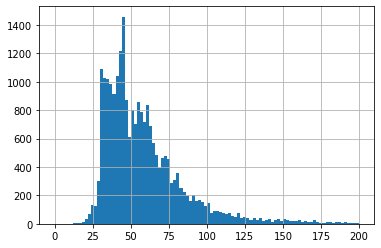

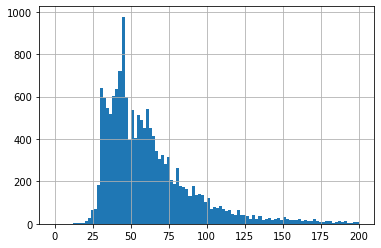

In [73]:
spb = data.query('locality_name == "санкт-петербург"')

data['total_area'].hist(range=(0, 200), bins=100)
plt.show()
spb['total_area'].hist(range=(0, 200), bins=100)
plt.show()

Гистограмма среза spb и всего набора данных внешне похожи - имеют по три пика: около 30 кв.м. и 45 кв.м. (самый большой пик).

Нетипично большую общую площадь признаем выбросами и отбросим. 

Таких объектов немного и скорее всего скорее всего такая недвижимость — коммерческая. Например, под офисные помещения или коттеджи и дома. В рамках нашего исследования коммерческая недвижимость нас не интересует. 


Как определим, что общая площадь недвижимости слишком большая? 

Недвижимость площадью 150 кв.м. — уже редки. На участке более 200 кв.м. гистограмма сливается с нулём.
Примем верхнюю границу в 200 кв.м. Если отбросить значения больше 200, много данных не потеряется. 

Продолжаем работать с наблюдениями, удовлетворяющими условию: 


In [74]:
data = data[data['total_area'] < 200]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.00000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.30000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,108.989252,9,False,False,False,39.40634,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.83000,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50000,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,14.05245,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,52.609592,12,False,False,False,23.30000,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0




🔎 **2. Изучаем "living_area"**

In [75]:
data['living_area'].describe()

count    23419.000000
mean        33.818852
std         17.635445
min          2.000000
25%         19.000000
50%         30.160548
75%         42.400000
max        164.700000
Name: living_area, dtype: float64

<AxesSubplot:>

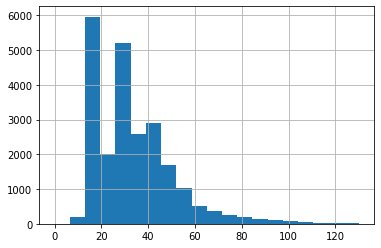

In [76]:
data['living_area'] = data['living_area'].astype('float')
data['living_area'].hist(bins=20, range = (0, 130))

<AxesSubplot:>

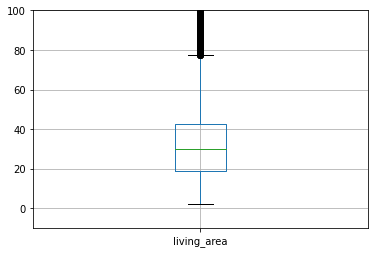

In [77]:
living_area = data[['living_area', 'locality_name']]
plt.ylim(-10, 100)
living_area.boxplot()

Большая часть значений лежит в диапазоне от 19 до 42 кв.м., что выглядит правдоподобно.

Нижний «ус» лежит примерно на 2 кв.м., что подозрительно. Верхний заканчивается около 78 кв.м. Всё, что лежит за верхним «усом», считается выбросом. И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Более пристально посмотрим на недвижимость, где указана жилая площадь меньше 10 кв.м.:

In [78]:
data[data['living_area'] < 10].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
114,5,4000000.0,21.4,2019-02-07,1,2.9,8,8.3,7,False,False,False,6.300000,0,санкт-петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,NaN,186915.89,3,2,2019,другой,6.0
680,14,7200000.0,43.0,2017-10-31,1,NaN,8,9.0,2,False,False,False,23.000000,0,санкт-петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296.0,167441.86,1,10,2017,другой,5.0
1326,8,8100000.0,52.0,2017-01-29,2,2.7,25,9.0,15,False,False,False,32.000000,2,санкт-петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337.0,155769.23,6,1,2017,другой,16.0
2309,10,4200000.0,62.4,2017-06-15,2,2.6,9,8.4,6,False,False,False,41.000000,2,поселок шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111.0,67307.69,3,6,2017,другой,29.0
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17,3.0,17,False,False,False,11.000000,0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0,108292.68,6,7,2017,последний,13.0
4100,17,5300000.0,34.8,2017-06-19,1,2.7,23,9.0,15,False,False,False,17.100000,0,санкт-петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30.0,152298.85,0,6,2017,другой,13.0
4542,12,3300000.0,18.0,2018-11-07,1,3.5,5,9.0,2,False,False,False,4.461095,0,санкт-петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9.0,183333.33,2,11,2018,другой,5.0
7312,8,3400000.0,27.0,2018-02-21,2,2.5,15,9.0,4,False,False,False,16.000000,0,санкт-петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,NaN,125925.93,2,2,2018,другой,16.0
8325,9,4800000.0,52.0,2017-10-25,2,NaN,5,9.0,2,False,False,False,6.000000,1,санкт-петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119.0,92307.69,2,10,2017,другой,13.0
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6,2.0,2,False,False,False,9.000000,0,санкт-петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0,122115.38,1,2,2018,другой,7.0


Видим, что таких объектов всего 28. Не так уж и много относительно всего массива данных. 

Однако, эти аномалии не поддаются какому-то одному логическому объяснению. 

Есть строки с большой общей площадью и маленькой жилой площадью. Казалось бы, что возможно продавец ошибся: хотел указать жилую площадь 30 (при общей площади 41), а указал 3.0 кв.м. Но также имеются строки с общей площаью 37 кв.м. и жилой площадью 8.0 кв.м. То есть переносить точку в данных будет некорректным. 

Имеются также объекты с маленькой жилой площадью, где указано 0 комнат. 


Проверим, есть ли строчки, где жилая площадь больше общей: 

In [79]:
data[data['living_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance


Таких строчек нет - это хорошо. Удалять выбросы, которые выше верхнего уса нецелесообразно. Эти выбросы выглядят правдоподобными.

Аномальными считаю только строки с жилой площадью меньше 10.

Оставим пока что в этом столбце всё как есть в связим с тем, что количество аномальных строчек не так велико. Не хочется терять данные, указанные в других столбцах аномальных строк, так как они выглядят логичными. 



🔎 **Изучаем "kitchen_area"**

In [80]:
data['kitchen_area'] = data['kitchen_area'].astype('float')
data['kitchen_area'].describe()

count    23419.000000
mean        10.650351
std          5.590938
min          1.300000
25%          7.100000
50%          9.400000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

In [81]:
data['kitchen_area'].max()

93.2

In [82]:
data['kitchen_area'].min()

1.3

<AxesSubplot:>

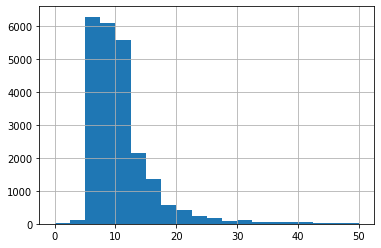

In [83]:

data['kitchen_area'].hist(bins=20, range = (0, 50))

<AxesSubplot:>

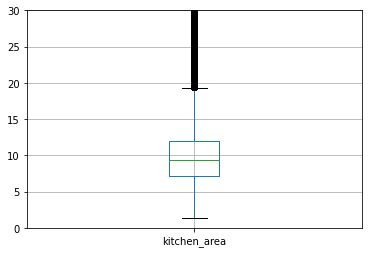

In [84]:
kitchen_area = data[['kitchen_area', 'locality_name']]
plt.ylim(0, 30)
kitchen_area.boxplot()

Медиана и пик в районе 8 кв.м. В силу того, что в данных много квартир с площадью от 40  до 70 кв.м., маленькая кухня выглядит правдоподобно. 

Данные варьируются от 7 до 12 кв.м.

Привлекают внимания объекты с кухней меньше 3 кв.м. Посмотритм на них ближе: 

In [85]:
data[data['kitchen_area'] < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
20217,7,4250000.0,28.5,2019-05-01,1,2.8,14,19.5,10,False,False,False,1.3,0,санкт-петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN,149122.81,2,5,2019,другой,13.0


Всего одна строчка и выглядит достаточно правдоподобно. Допустим, что есть кухни размером 1.3 кв.м.

Проверим, есть ли строчки, где кухня больше общей площади:

In [86]:
data[data['kitchen_area'] > data['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance


Таких строчек нет. 
Замечательно! 

Оставим в данной колонке все как есть. 



🔎 **Изучаем "last_price"**

In [87]:
data['last_price'].describe()

count    2.341900e+04
mean     6.021068e+06
std      6.229997e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [88]:
data['last_price'].max()

330000000.0

In [89]:
data['last_price'].min()

12190.0

<AxesSubplot:>

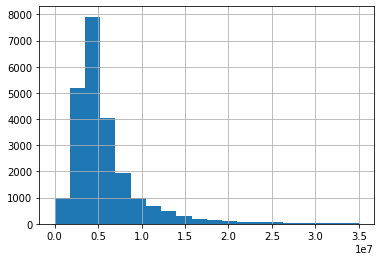

In [90]:
data['last_price'].hist(bins=20, range = (0, 35000000))

<AxesSubplot:>

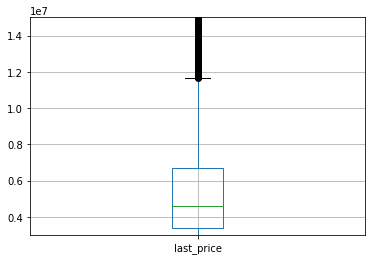

In [91]:
last_price = data[['last_price', 'locality_name']]
plt.ylim(3000000, 15000000)
last_price.boxplot()

Видим, что большая часть значений лежит в диапазоне от 3 000 000 до 7 000 000 рублей, что выглядит правдоподобно. 

Верхний ус заканчивается около 11 000 000. ВБолее высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

И в целом стоимость недвижимости особенно в Санкт-Петербурге может достигать стоимости выше 11 000 000 рублей, поэтому оставим выбросы.

Произведем выборку по Санкт-Петербургу и сравним гистограммы. 

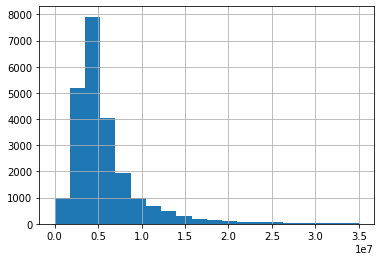

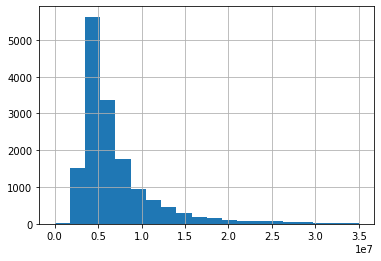

In [92]:
data['last_price'].hist(bins=20, range = (0, 35000000))
plt.show()
spb['last_price'].hist(bins=20, range = (0, 35000000))
plt.show()

Гистограмма среза spb и всего набора данных внешне похожи - имеют пик около 5 000 000 рублей.

В большей степени настораживает минимальное значение 12 190 рублей. Явно недостоверная стоимость. 

Нетипично маленькую стоимость недвижимости признаем выбросами и отбросим.
Вполне возможно это указали стоимость за аренду, а не продажу. В рамках нашего исследования арендла недвижимости нас не интересует.

Примем нижнюю границу в 500 000 рублей.

Продолжаем работать с наблюдениями, удовлетворяющими условию:

In [93]:
data = data[data['last_price'] > 500000]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.00000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.30000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,108.989252,9,False,False,False,39.40634,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0




🔎 **Изучаем "rooms"**

In [94]:
data['rooms'].describe()

count    23401.000000
mean         2.034187
std          0.995560
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [95]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

<AxesSubplot:>

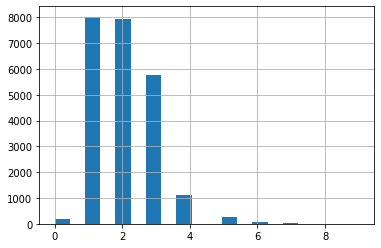

In [96]:
data['rooms'].hist(bins=20, range = (0, 9))

Больше всего настораживают строки, где указано 0 комнат. 
Посмотрим на них поближе: 

In [97]:
data[data['rooms'] == 0].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
144,1,2450000.0,27.00,2017-03-30,0,NaN,24,15.500000,2,False,True,False,6.691643,2,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0,90740.74,3,3,2017,другой,NaN
349,4,2320000.0,25.00,2017-09-27,0,NaN,14,17.000000,1,False,False,True,6.195965,0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,92800.00,2,9,2017,первый,NaN
440,8,2480000.0,27.11,2018-03-12,0,NaN,17,24.750000,4,False,True,False,6.718905,2,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26,24.300000,19,False,False,True,8.525648,1,поселок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.47,1,3,2017,другой,19.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10,17.136675,7,False,True,False,6.195965,0,поселок шушары,16061.458716,NaN,NaN,NaN,NaN,NaN,29.0,74000.00,2,2,2019,другой,NaN


In [98]:
data['total_area'][data['rooms'] == 0].describe()

count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64

In [99]:
data['kitchen_area'][data['rooms'] == 0]

144      6.691643
349      6.195965
440      6.718905
508      8.525648
608      6.195965
           ...   
23210    6.443804
23442    6.865130
23554    6.443804
23592    7.187320
23637    6.443804
Name: kitchen_area, Length: 196, dtype: float64

In [100]:
data['living_area'][data['rooms'] == 0]

144      15.500000
349      17.000000
440      24.750000
508      24.300000
608      17.136675
           ...    
23210    18.000000
23442    18.000000
23554    17.822142
23592    18.000000
23637    17.000000
Name: living_area, Length: 196, dtype: float64

In [101]:
data['studio'][data['rooms'] == 0]

144       True
349      False
440       True
508      False
608       True
         ...  
23210     True
23442    False
23554     True
23592    False
23637     True
Name: studio, Length: 196, dtype: bool

Изначально показалось, что квартиры, где указано 0 комнат, имеют маленькую площадь. Однако, есть строки, где общая площадь квартиры составляет 98 кв.м.

Во всех втрочках, где оказано 0 комнат, не указана площадь кухни. 

Можно предполижить, что это квартиры-студии. 
Однако, в столбце studio где-то имеется признак False, а где то True.

Следовательно какой-то логичный вывод о природе нулевых значений относительно количества комнат сделать не представляется возможным. 
А так как количество комнат существенно влияет при продаже квартир, то эти данные могу исказить конечные выводы.
Удалим строки, где указано 0 комнат:

In [102]:
data = data[data['rooms'] > 0]
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.600000,1,False,False,False,11.00000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.300000,4,False,False,False,8.30000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,108.989252,9,False,False,False,39.40634,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0




🔎 **Изучаем "ceiling_height"**

<AxesSubplot:>

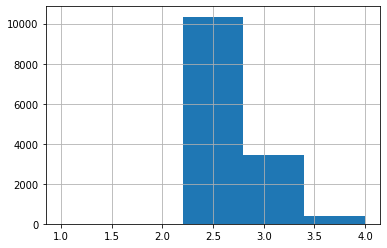

In [103]:
data['ceiling_height'] = data['ceiling_height'].astype('float')
data['ceiling_height'].hist(bins=5, range = (1, 4))

<AxesSubplot:>

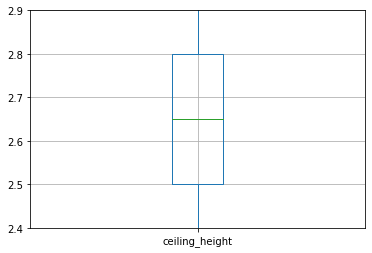

In [104]:
ceiling_height = data[['ceiling_height', 'locality_name']]
plt.ylim(2.4, 2.9)
ceiling_height.boxplot()

Предположим, что могут встретиться квартиры с высотой потолка до 6 метров. Однако, всё, что выше 10 метров, признаем аномальными значениями. 

Также аномальными значениями признаем квартиры с высотой потолка ниже 2 метров. 

Если указана высота потолков, к примеру, 25 м и 32 м., логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 
Скорректируем данные:

In [105]:
data.loc[(data['ceiling_height'] >= 22) & (data['ceiling_height'] <= 32), 'ceiling_height'] = data['ceiling_height'] / 10

In [106]:
data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] <= 20), 'ceiling_height'] = 2.5

In [107]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.5

In [108]:
data = data.loc[data['ceiling_height'] != 100]

In [109]:
data['ceiling_height'].max()

8.3

In [110]:
data['ceiling_height'].min()

2.0

Так как мы прибрались в данных, можно заполнить пропуски медианным значением:

In [111]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 



🔎 **Изучаем "floor_type"**

<AxesSubplot:>

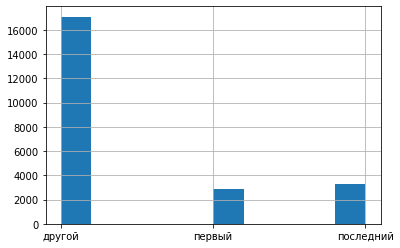

In [112]:
data['floor_type'].hist()

Количество квартир на первом и последнем этажах примерно ровно. В то же время количество квартир на средних этажах составляет более 16 тысяч объявлений. 



🔎 **Изучаем "floors_total"**

<AxesSubplot:>

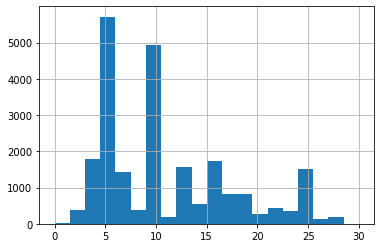

In [113]:
data['floors_total'].hist(bins=20, range = (0, 30))

Чаще всего квартиры продаются в 5-ти этажных и 10 этажных домах.

In [114]:
data['floors_total'].describe()

count    23204.000000
mean        10.677642
std          6.577577
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Настораживает, что максимальное значение 60 этажей. Согласно общеизвестным данным самый высокий жилой дом в Санкт-Петербурге имеет 37 этажей.

Удалим данные, где количество этажей превышает 37: 

In [115]:
data = data[data['floors_total'] <= 37]
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,first_exposition_day_of_week,first_exposition_day_month,first_exposition_day_year,floor_type,center_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.00000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.00000,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.30000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,108.989252,9,False,False,False,39.40634,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.00000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,False,False,13.83000,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,False,False,8.50000,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52542.37,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.700000,1,False,False,False,14.05245,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.71,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,52.609592,12,False,False,False,23.30000,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.40,1,3,2017,другой,10.0




🔎 **Изучаем "center_distance"**

In [116]:
data['center_distance'] = data['center_distance'].fillna('NaN')
data['center_distance'] = data['center_distance'].astype('float')
data['center_distance'].describe()

count    17791.000000
mean        14.285032
std          8.614737
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: center_distance, dtype: float64

In [117]:
data['center_distance'].min()

0.0

Не факт, что если указано расстояние до центра 0, то это ошибка. Квартира может находиться в центре. 

In [118]:
data['center_distance'].max()

66.0

<AxesSubplot:>

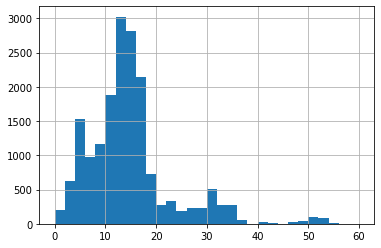

In [119]:
data['center_distance'].hist(bins=30, range = (0, 60))

<AxesSubplot:>

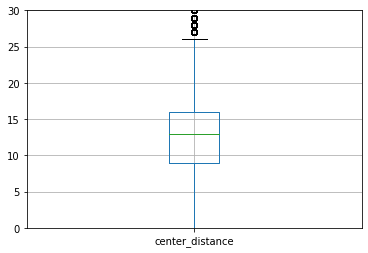

In [120]:
last_price = data[['center_distance', 'locality_name']]
plt.ylim(0, 30)
last_price.boxplot()

Большая часть значений лежим в промежутке между 9 и 16 км. Это тостаточно большое расстояние до центра. Вряд ли такие расстояния есть в поселках.

Произведем выборку по Санкт-Петербургу и сравним гистограммы.

<AxesSubplot:>

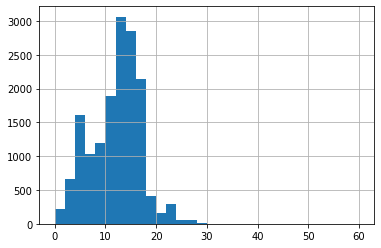

In [121]:
spb['center_distance'].hist(bins=30, range = (0, 60))

Гистограмма среза spb и всего набора данных внешне похожи - имеют по два пика: около 5 км и 15 км.



🔎 **Изучаем "parks_nearest"**

In [122]:
data['parks_nearest'] = data['parks_nearest'].fillna('NaN')
data['parks_nearest'] = data['parks_nearest'].astype('float')
data['parks_nearest'].describe()

count    7881.000000
mean      491.669839
std       343.429183
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [123]:
data['parks_nearest'].min()

1.0

In [124]:
data['parks_nearest'].max()

3190.0

<AxesSubplot:>

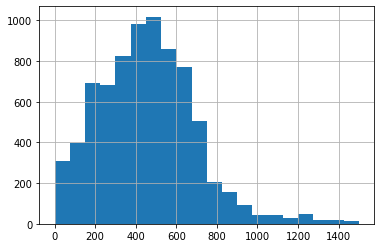

In [125]:
data['parks_nearest'].hist(bins=20, range = (0, 1500))

<AxesSubplot:>

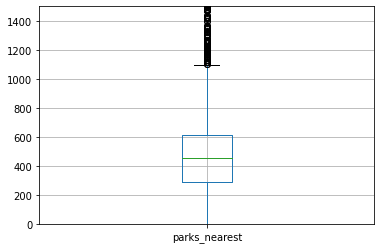

In [126]:
last_price = data[['parks_nearest', 'locality_name']]
plt.ylim(0, 1500)
last_price.boxplot()

Болшая часть значений лежим в диапазоне от 300 до 610 метрах. Минимальное расстояние до парка 1 метр (вероятно, квартира находится прямо около парка). Максимальное значение: 3190 метров.

#### Изучаем, как быстро продавались квартиры

In [127]:
data['days_exposition'] = data['days_exposition'].astype('float')
data['days_exposition'].describe()

count    20090.000000
mean       180.214933
std        218.740679
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [128]:
data['days_exposition'].min()

1.0

In [129]:
data['days_exposition'].max()

1580.0

In [130]:
data['days_exposition'].mean()

180.21493280238926

In [131]:
data['days_exposition'].median()

95.0

<AxesSubplot:>

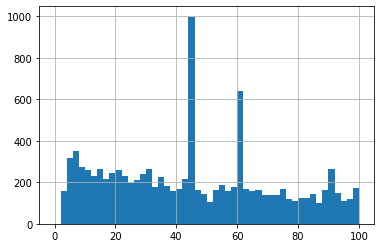

In [132]:
data['days_exposition'].hist(bins=50, range = (0, 100))

<AxesSubplot:>

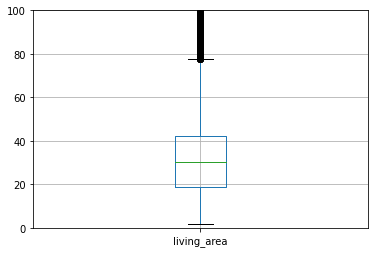

In [133]:
days_exposition = data[['days_exposition', 'locality_name']]
plt.ylim(0, 100)
living_area.boxplot()

Сгруппируем данные по длительности размещения объявления: 

In [134]:
data.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(10)

days_exposition
45.0    864
60.0    534
7.0     227
30.0    201
90.0    194
4.0     171
3.0     154
5.0     147
14.0    142
9.0     139
Name: first_day_exposition, dtype: int64

Большая часть квартир продается от 1 до 8 месяцев.
Средняя арифметическая длительность продажи квартиры занимает 180 дней (6 месяцев). Однако, данный показатель сильно увеличивает выбросы.
Согласно медианному значению продажа квартиры занимает 3 месяца. 
Интересно посмотреть более пристально на природу данных выбросов. Сгруппируем данные по населенному пункту и по количеству комнат:

Самые ярковыраженные пики на 45, 60 и 90 днях. Но если присмотреться ещё более внимательно на группированные данные, то мы видим всплекси на следующей длительности размещения объявления: недель, месяц, 45 дней, 60 дней и 90 дней. Какие-то очень круглые цифры. Возможно при размещенииобъявления продавец мог указать в настройках "снять объявление через месяц". 

In [135]:
data.groupby('locality_name')['days_exposition'].mean().sort_values(ascending=False).head()

locality_name
поселок севастьяново              1069.0
деревня рабитицы                  1007.0
поселок молодёжное                 786.0
поселок коробицыно                 750.0
поселок городского типа рябово     647.0
Name: days_exposition, dtype: float64

In [136]:
spb['days_exposition'] = spb['days_exposition'].astype('float')
spb['days_exposition'].mean()

182.792198269541

In [137]:
spb['days_exposition'].median()

95.0

Дольше всего недвижимость продается в поселках. В Санкт-Петербурге квартиры являются более ликвидными: в среднем продаются от 3 до 6 месяцев. 

Теперь посмотрим скорость продажи в зависимости от количества комнат: 

In [138]:
data.groupby('rooms')['days_exposition'].mean().sort_values(ascending=False)

rooms
11    813.000000
5     282.767677
6     280.395349
4     252.972376
3     203.597871
7     182.727273
2     173.179707
1     158.885379
8     115.000000
Name: days_exposition, dtype: float64

In [139]:
data.groupby('rooms')['rooms'].count()

rooms
1     8022
2     7916
3     5782
4     1132
5      264
6       62
7       20
8        2
11       2
Name: rooms, dtype: int64

Изначальнь показалось, что 8-ми комнатные квартиры продаются быстрее всего (за 3,5 месяца). Но это лишь показалось, потому что таких объявлений было всего два. 

Конечно же, максимально быстро в среднем продаются 1 и 2-комнатные квартиры. В среднем за 5 месяцев. 

На скорость продажи квартир, где 6 и более комнат, считаю, что смотреть не корректно, так как по ним слишком мало данных. 

3 и 4-х комнатные квартиры в среднем продаются за 7-8 месяцев. 
5-ти комнатные тоже продаются в среднем до года. 

Таким образом, самые ликвидные квартиры - это 1-2 комнатные квартиры в Санкт-Петербурге, так как они продаются достаточно быстро. Самые медлительные продажи - это продажи квартир в поселках с большим количеством комнат (от 7 месяцев). 

#### Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта.

🔎 **Фактор "total_area"**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

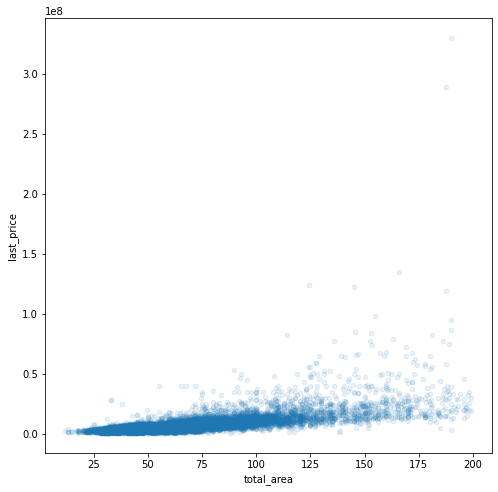

In [140]:
data.plot.scatter(x='total_area', y='last_price', alpha=0.1, figsize=(8,8))

In [141]:
data[['total_area', 'last_price']].corr()

,total_area,last_price
total_area,1.000000,0.658459
last_price,0.658459,1.000000


И график и коэффициен корреляции (65%) показывают зависимость стоимости квартиры от общей площади. Чем больше площадь квартиры, тем выше стоимость жилья.

При этом график также иллюсрирует, что есть небольшие объекты (до 50 кв.м.), стоимость которых может стоить столько же, сколько и стоимость объектов побольше (от 50 до 75 кв.м.). Вероятно, на общую стоимость влияет не только площадь, но и другие факторы в совокупности. Изучим их.

🔎 **Фактор "rooms"**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

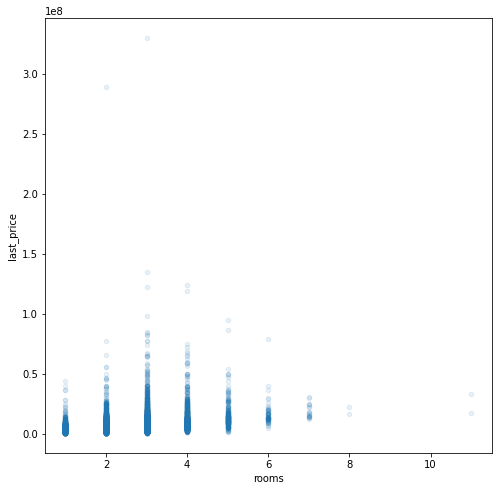

In [142]:
data.plot.scatter(x='rooms', y='last_price', alpha=0.1, figsize=(8,8))

In [143]:
data[['rooms', 'last_price']].corr()

,rooms,last_price
rooms,1.000000,0.378221
last_price,0.378221,1.000000


Наблюдается зависимость стоимости объекта от количества комнат. Коэффициент корреляции составляет 37%: чем больше комнат, тем выше стоимость.

Дороже всего 3-х комнатные квартиры.

🔎 **Фактор "cityCenters_nearest"**

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

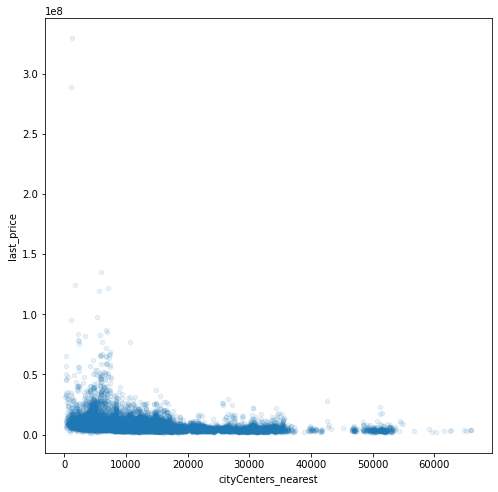

In [144]:
data.plot.scatter(x='cityCenters_nearest', y='last_price', alpha=0.1, figsize=(8,8))

In [145]:
data[['cityCenters_nearest', 'last_price']].corr()

,cityCenters_nearest,last_price
cityCenters_nearest,1.000000,-0.275294
last_price,-0.275294,1.000000


Отрицательный коэффициент корреляции (-27%) свидетельствует о том, что взаимосвязь между переменными есть. На графике видно, что чем удаленнее находится объект от центра города, тем ниже стоимость объекта.

🔎 **Факторы "first_exposition_day_of_week", "first_exposition_day_month" и "first_exposition_day_year"**

In [146]:
day_price = data.pivot_table(index='first_exposition_day_of_week', values='last_price')

In [147]:
month_price = data.pivot_table(index='first_exposition_day_month', values='last_price')

In [148]:
year_price = data.pivot_table(index='first_exposition_day_year', values='last_price')

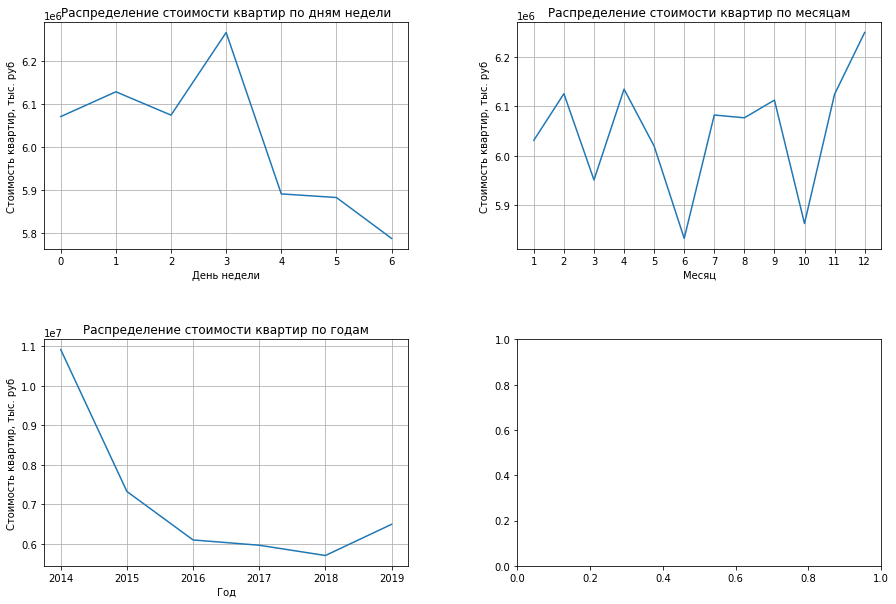

In [149]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax[0][0].plot(day_price['last_price'])
ax[0][1].plot(month_price['last_price'])
ax[0][0].set(xlabel='День недели', ylabel='Стоимость квартир, тыс. руб', 
          title='Распределение стоимости квартир по дням недели')
ax[0][1].set(xlabel='Месяц', ylabel='Стоимость квартир, тыс. руб', 
          title='Распределение стоимости квартир по месяцам', xticks=month_price.index);

ax[0][0].grid()
ax[0][1].grid()
ax[1][0].plot(year_price['last_price'])
ax[1][0].set(xlabel='Год', ylabel='Стоимость квартир, тыс. руб', 
          title='Распределение стоимости квартир по годам')
ax[1][0].grid()
plt.subplots_adjust(wspace = 0.3, hspace = 0.4) 
plt.show()

Средняя стоимость квартир, которые разместили на продажу в четверг существенно выше. В воскресенье чаще всего размещают объявления с низкой стоимостью. Это может быть обусловдено графиком работы риэлторов. Скорее всего, с понедельника по вторник они оценивают недвижимость на месте и ближе к концу недели размещают объявления. 
По воскресеньям же объявления пубоикуют частные лица. В силу того, что у частных лиц насмотренность меньше, то и стоимость они могут выставлять меньше рыночной, чтобы быстрее осуществить сделку. 

Также наблюдается существенный спад средней стоимости квартир в марте, в июне и в октябре. Можно предположить, что спалы связаны с сезоном отпусков. Именно на эти периоды приходятся каникулы у детей. Родители занимаются отпуском, а не сделками по недвижимости. 
Дороже всего квартиры в декабре. Вероятно влияет предновогоднее настроение и желание покупать в новый год что угодно по любой цене. 

 
Средняя стоимость квартир была ниже всего в 2016-2018 годах. Вероятно в эти года на стоимость квартир сказывался мировой финансовый кризис. 

🔎 **Фактор "kitchen_area"**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

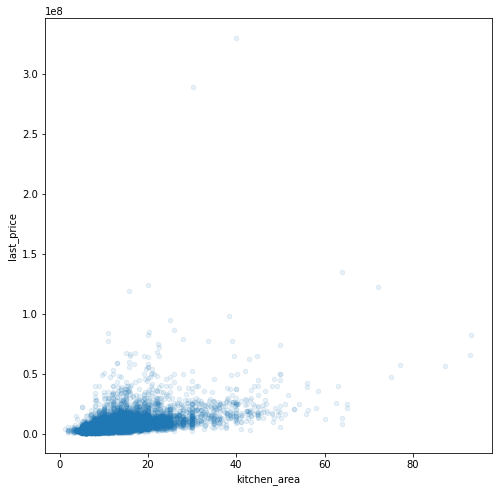

In [150]:
data.plot.scatter(x='kitchen_area', y='last_price', alpha=0.1, figsize=(8,8))

In [151]:
data[['kitchen_area', 'last_price']].corr()

,kitchen_area,last_price
kitchen_area,1.000000,0.527572
last_price,0.527572,1.000000


Площадь кухни существенно влияет на стоимость квартиры. Коэффициент корреляции 51%: чем больше кухня, тем выше стоимость объекта. 
    
При этом график свидетельствует, что кухня до 10 кв.м. практически не прибавляет в стоимости.    

🔎 **Фактор "living_area"**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

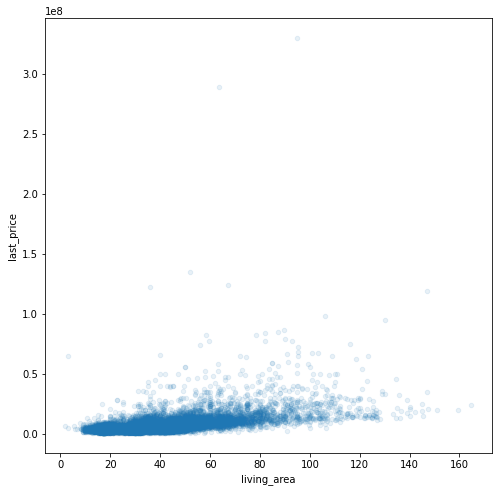

In [152]:
data.plot.scatter(x='living_area', y='last_price', alpha=0.1, figsize=(8,8))

In [153]:
data[['living_area', 'last_price']].corr()

,living_area,last_price
living_area,1.000000,0.553628
last_price,0.553628,1.000000


Жилая площадь также влияет на стоимость квартиры. Коэффициент корреляции 53%: чем больше жилое пространство, тем выше стоимость объекта. 
    
На графике отображено, что существенное влияние жилой площади на стоимость начинается после 30 кв.м.   

🔎 **Фактор "floor_type"**

In [154]:
price_floor_type = (
    data.pivot_table(index='floor_type', values='last_price', columns='rooms')
)
display(price_floor_type)

rooms,1,2,3,4,5,6,7,8,11
floor_type,,,,,,,,,
другой,3.973141e+06,6.006905e+06,8.566205e+06,1.260501e+07,1.568559e+07,1.566387e+07,1.887091e+07,NaN,33000000.0
первый,3.231115e+06,4.182183e+06,5.829534e+06,7.505576e+06,9.762286e+06,1.591578e+07,2.523000e+07,19145000.0,NaN
последний,3.403458e+06,5.001603e+06,7.426658e+06,1.189795e+07,1.750212e+07,2.044318e+07,1.506167e+07,NaN,17500000.0


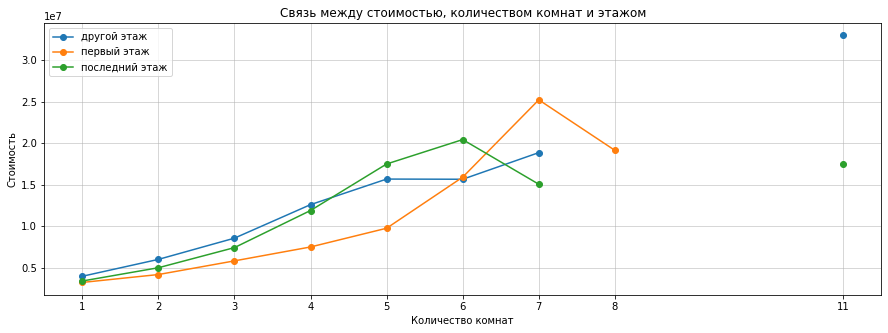

In [155]:
fig, ax = plt.subplots(figsize=(15, 5))

for i in price_floor_type.index:
    ax.plot(price_floor_type.columns, price_floor_type.loc[i], marker ='o', label=f'{i} этаж')
plt.xticks(price_floor_type.columns)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(loc='upper left')
plt.title('Связь между стоимостью, количеством комнат и этажом')
plt.show()

<AxesSubplot:>

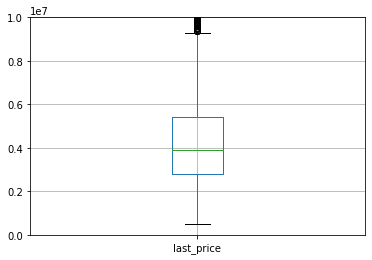

In [156]:
first = data.query('floor_type == "первый"')

floor_type_influence_first = first[['floor_type', 'last_price']]
plt.ylim(0, 10000000)
floor_type_influence_first.boxplot()

<AxesSubplot:>

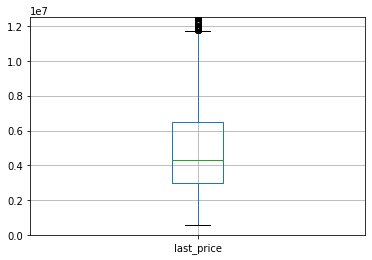

In [157]:
last = data.query('floor_type == "последний"')

floor_type_influence_last = last[['floor_type', 'last_price']]
plt.ylim(0, 12500000)
floor_type_influence_last.boxplot()

<AxesSubplot:>

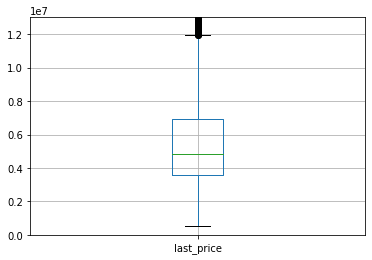

In [158]:
other = data.query('floor_type == "другой"')

floor_type_influence_other = other[['floor_type', 'last_price']]
plt.ylim(0, 13000000)
floor_type_influence_other.boxplot()

Самая слабая взаимосвязь между стоимостью и этажность у однокомнатных квартир. Они же являются саамыми дешевыми квартирами.
Самые дешевые квартиры на первом этаже, самые дорогие - на средних. Первый этаж становится самым дорогим при 7, 8 комнатах.

Стоимость квартир на первом этаже варьируется примерно от 2,5 млн.руб. до 5,5 млн.руб.
Стоимость квартир на последнем этаже варьируется примерно от 2,5 млн.руб. до 6,5 млн.руб.
Квартиры на средних этажах стоях от 3,5 млн.руб. до 7 млн.рублей. 

Таким образом, квартиры на средних этажах имеют более высокую ценность, что отражается на стоимости.  

**Вывод**

Сильнее всего на стоимость кварттиры влияет общая площадь квартиры, жилая площаль и площадь кухни. Также немаловажен фактор количества комнат и удаленность от центра. 

В меньшей степени на стоимость влияет на стоимость период публикации объявления и этажность. 

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [159]:
announcement_count = data.pivot_table(index='locality_name', values='last_price', aggfunc='count').sort_values(by='last_price', ascending=False).head(10)
announcement_count.columns = ['count']
announcement_count

,count
locality_name,
санкт-петербург,15393
поселок мурино,529
поселок шушары,436
всеволожск,392
пушкин,364
колпино,337
поселок парголово,322
гатчина,307
деревня кудрово,283


In [160]:
avg_price_per_area = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean').sort_values(by='price_per_meter', ascending=False).round()
avg_price_per_area

,price_per_meter
locality_name,
зеленогорск,115123.0
санкт-петербург,113458.0
деревня бор,105539.0
поселок репино,104239.0
пушкин,103123.0
...,...
деревня сижно,13710.0
деревня выскатка,13208.0
поселок тёсово-4,12931.0


In [161]:
stat_full = announcement_count.join(avg_price_per_area)
stat_full.sort_values(by='price_per_meter', ascending=False)

,count,price_per_meter
locality_name,,
санкт-петербург,15393,113458.0
пушкин,364,103123.0
деревня кудрово,283,92297.0
поселок парголово,322,90448.0
поселок мурино,529,85004.0
поселок шушары,436,78406.0
колпино,337,75333.0
гатчина,307,68746.0
всеволожск,392,68618.0


Самая высокая стоимость за квадратный метр в Санкт-Петербурге (113 505 рублей), там же и самое большое количество объявлений о продаже (более 15 тысяч). 
Недалеко по стоимости за квадратный метр ушел населенный пункт Пушкин, там стоимость составляет 103 123 рублей, при этом количество объявлений существенно отличается - меньше в пять раз. 

Самая низная стоимость за квадратный метр в Гатчине, Всеволожске и Выборге - меньше 70 тысяч за квадрат. 

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра. 

Построим сводную таблицу средней стоимости квартиры в зависимости от удаленности от центра города.
Далее визуализиуем данные на графике для наглядности.

<AxesSubplot:xlabel='center_distance'>

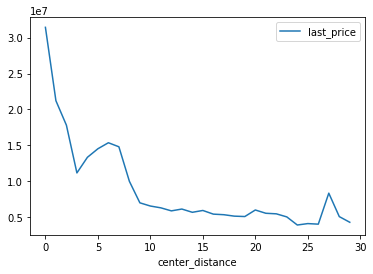

In [162]:
avg_last_price = spb.pivot_table(index='center_distance', values='last_price', aggfunc='mean').round()
avg_last_price.plot()

Построим сводную таблицу средней стоимости квадратного метра в зависимости от удаленности от центра города.
Также визуализиуем данные на графике для наглядности.

<AxesSubplot:xlabel='center_distance'>

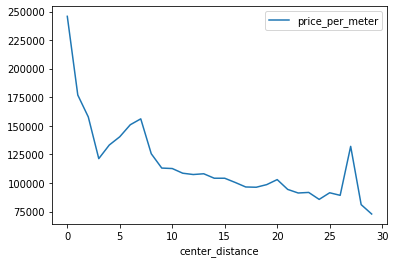

In [163]:
avg_price_per_meter = spb.pivot_table(index='center_distance', values='price_per_meter', aggfunc='mean').round()
avg_price_per_meter.plot()

In [164]:
stat_full_spb = avg_last_price.join(avg_price_per_meter)
stat_full_spb

,last_price,price_per_meter
center_distance,,
0.0,31449116.0,245834.0
1.0,21206721.0,177005.0
2.0,17788320.0,157849.0
3.0,11126581.0,121387.0
4.0,13304280.0,133283.0
5.0,14499121.0,140510.0
6.0,15338418.0,151012.0
7.0,14775153.0,156177.0
8.0,9957717.0,125671.0


Данные свидетельствуют о том, что чем удаленнее квартира находится от центра, тем ниже стоимость квадратного метра. К примеру, средняя стоимость квадратного метра в центре Петербурга составляет 245834 рублей. При этом, стоимость квадрата на окраине города составляет всего  72953 рубля. 

Интересно отметить, что график цен на квадратный метр имеет два пиковых значения: на 7 км от центра города и на 27 км от центра города. Такие всплески можно обосновать тем, что именно в данной удаленности от центра находятся квартиры более высокой стоимости (вероятно, жилье элитного класса).  

### Общий вывод

В рамках настоящего исследования была проведена предварительная обработка данных — устранены пропуски, аномальные значения, обработаны названия населенных пунктов. 
Скорее всего, часть пропущенных значений появлялись в связи с тем, что пользователи не вводили необходимые данные. Для устранения подобных пропусков желательно провести работу по установлению обязательных полей при создании объявления. 
Для недопущения возникновения аномалий в столбце с названиями населенных пунктов желательно производить забор данных из ФИАСа. 

Проведя анализ данных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах можно сделать следующие выводы: 
1) Самой ликвидной недвижимостью являются - 1-2 комнатные квартиры в Санкт-Петербурге. 

2) В центре Петербурга квартиры дороже, чем в пригороде. 

3) Студии и 1-комнатные по цене квадратного метра лидлируют и продаются быстрее всего. К тому же и количество их предложений самое большое.

4) Продавать квартиры в периоды каникул у школьник (тем более в июле) - невыгодно, так как приходится скидывать стомиость для привлечения внимания покупателей. Самый жаркий месяц для продажи - декабрь. 

Отвечая на главный вопрос о том, какие параметры влияют на цену объектов, можно сказать следующее: 

Существует зависимость между площадью квартиры и ее стоимостью, а также между площадью и количеством комнат: чем больше площадь квартиры, тем в ней больше комнат и тем она дороже. 
